Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 4 cas pratiques:
- SQL, RGPD, Web Scraping et API
- Pandas
- Machine Learning
- Business Case

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

**Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard ______ dans le dossier drive individuel dont le lien vous a été communiqué par mail. Pensez bien à rendre accessible votre devoir en "Viewer".**   

---

**Pour le cas pratique "Business Case", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**  
---

Veuillez mettre dans le dossier vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans ce dossier, dans le temps imparti.


De mercredi à vendredi, auront lieu les oraux pour chaque étudiant.
Chaque passage à l'oral se déroule de la façon suivante:

1. Questions du formateur à l'étudiant, à partir du google collab qui contient les réponses aux cas pratiques SQL, RGPD, Web Scraping & API, Pandas et Machine Learning. Vous devrez partager votre écran et permettre au formateur de vous poser des questions sur le travail fourni sur votre fichier google collab.
2. Présentation du cas pratique "Business Case", d'une durée de 7 minutes, suivi d'une série de questions posées par le formateur.


Vous terminerez avec la présentation du cas pratique "Business Case", en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL, RGPD, Web Scraping & API  _(2 heures)_

## SQL

> 1. **Compétence C1.3** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. **Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.**

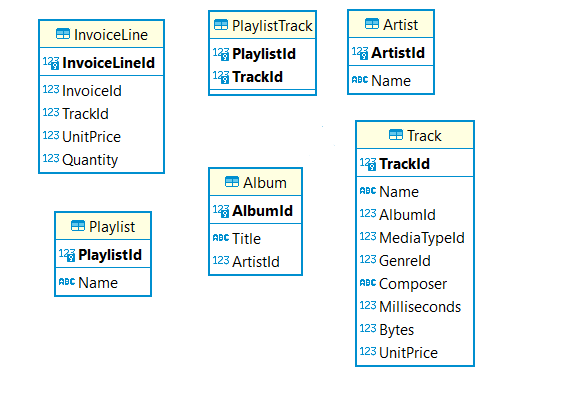

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

### Question SQL 1. - Compétences C1.3
**Réponse :**
<br></br>
<u>**Table InvoiceLine :**</u>

Cette table a pour clé primaire <u>**InvoiceLineID**</u>. Une ligne de facture a toujours un et un seul numéro, qui permet d'identifier le numéro de la ligne de facture. Celui-ci ne peut être présente en double.


InvoiceLine est liée à la table Invoice par la clé étrangère <u>**InvoiceID**</u> avec une relation 1, N. C'est à dire qu'une facture comporte au moins une ligne, mais peut également en avoir de multiple. Mais une ligne de facture ne peut être présente que dans une seule et unique facture.

InvoiceLine est liée à la table Track par la clé étrangère <u>**TrackID**</u>, avec une relation 1,N. Une ligne concerne donc une seule et unique chanson, mais une chanson peut être facturée dans différentes factures.
<br></br>
<u>**Table Album :**</u>

Cette table a pour clé primaire <u>**AlbumID**</u>. Un album est identifié par un numéro unique.

Elle rattachée à la table Artist par la clé étrangère <u>**ArtistID**</u>. Un album n'a qu'un seul artiste lié, mais un artiste peut avoir créer plusieurs album, c'est une relation 1, N.
<br></br>
<u>**Table Artist :**</u>          

Cette table a pour clé primaire <u>**ArtisteID**</u>. Un artiste a un unique identifiant.
<br></br>
<u>**Table Track :**</u>                        

Cette table a pour clé primaire <u>**TrackID**</u> qui permet d'identifié les chansons.

Elle est liée à la table Album par la clé étrangère <u>**AlbumID**</u> par une relation 1, N. Une chanson ne peut être présente dans différents albums. Mais un album a plusieur chanson.

Il y a également une relation avec une table dont l'identifiant est <u>**MediaTypeID**</u> qui est une clé étrangère. On peut supposer qu'une relation 1,N existe entre ces tables. Un ID de chanson ne pourra donc être présent qu'une fois par type de média, mais le média pourra comporte de multiple ID de chanson.

Ainsi qu'une clé étrangère <u>**GenreID**</u> qui lie la table Genre et Track par une relation 1,N. Une chanson n'a qu'un seul genre, mais un genre comporte 1 à N chanson(s).
<br></br>
<u>**Table Playlist :**</u>

Cette table a pour clé primaire <u>**PlaylistID**</u>, qui permet d'identifier de manière unique une playlist.
<br></br>
<u>**Table PlaylistTrack :**</u>         

Cette table est une table qui permet de créer un lien entre Playlist et Track.

Il s'agit d'une relation N, N : une chanson peut être présente dans plusieurs playlist, et les playslist comporte de nombreuse chanson.

Il y a donc deux clé étrangères <u>**PlaylistID**</u> et <u>**TrackID**</u> dans une table séparée qui permet d'identifier quelle playlist comporte quelle chanson.
<br></br>


> 2. **Compétence C1.3** Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



### Question SQL 2. - Compétence C1.3

**Réponse:**


La table PlaylistTrack est une table intermédiaire qui comporte 2 clés étrangères <u>**PlaylistID**</u> et <u>**TrackID**</u>.

Ces tables de lien sont utilisées pour permettre des relations de plusieurs à plusieurs. Sans elle, le lien entre table ne pourrait permettre de déterminer avec précision quel identifiant est présent de manière unique dans l'autre table.
<br></br>

3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [1]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/WildCodeSchool/wilddata/blob/main/music.zip?raw=true")
open('music.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("music.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('music.sqlite')



In [2]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 **Compétence C1.4** Renvoyer le nom de la playlist qui contient le plus de morceaux, ainsi que le nombre de morceaux pour cette playlist.

Résultat attendu:

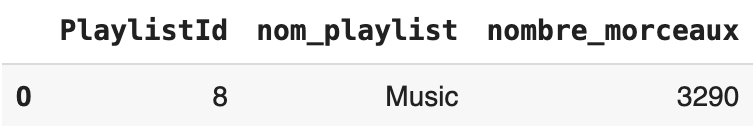

### Question SQL 3.1

In [3]:
pd.read_sql("""SELECT PlaylistTrack.PlaylistID, Playlist.Name as nom_playlist, COUNT(PlaylistTrack.TrackID) as nombre_morceaux
               FROM PlaylistTrack
               JOIN Playlist ON Playlist.PlaylistID=PlaylistTrack.PlaylistID
               GROUP BY PlaylistTrack.PlaylistID, nom_playlist
               ORDER BY nombre_morceaux DESC
               LIMIT 1
               """,
            conn)

,PlaylistId,nom_playlist,nombre_morceaux
0,1,Music,3290


> 3.2 Renvoyer les noms d'artistes, leur nombre de morceaux et leur nombre d'albums par artiste, dans l'ordre décroissant par rapport au nombre de morceaux.

Résultat attendu:

 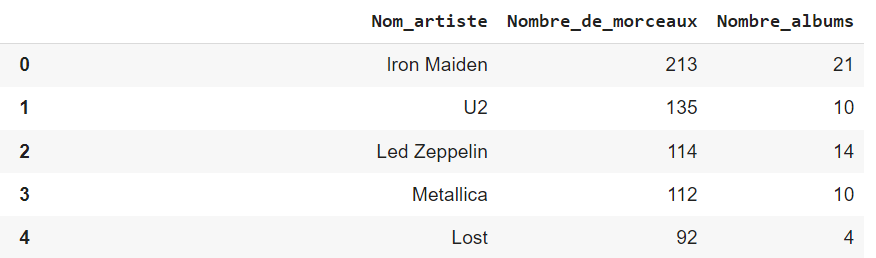

### Question SQL 3.2

In [4]:
pd.read_sql("""
          SELECT Artist.Name as Nom_artiste,
              (SELECT COUNT(DISTINCT Track.AlbumID)
               FROM Track
               JOIN Album ON Track.AlbumID = Album.AlbumID
               WHERE Album.ArtistID = Artist.ArtistID) AS Nombre_albums,
              (SELECT COUNT(Track.TrackID)
               FROM Track
               JOIN Album ON Track.AlbumID = Album.AlbumID
               WHERE Album.ArtistID = Artist.ArtistID) AS Nombre_de_morceaux
         FROM Artist
         ORDER BY Nombre_de_morceaux DESC, Nombre_albums ASC
         LIMIT 10
               """,#j'ai limité à 10 pour plus de lisibilité
            conn)

,Nom_artiste,Nombre_albums,Nombre_de_morceaux
0,Iron Maiden,21,213
1,U2,10,135
2,Led Zeppelin,14,114
3,Metallica,10,112
4,Lost,4,92
5,Deep Purple,11,92
6,Pearl Jam,5,67
7,Lenny Kravitz,1,57
8,Various Artists,4,56
9,The Office,3,53


> 3.3 **Compétence C1.1** Créer une requête qui renvoie le nombre de morceaux distinct dans la table `Track`. On souhaite renvoyer le nombre de morceaux qui ont des noms différents.

Résultat attendu:

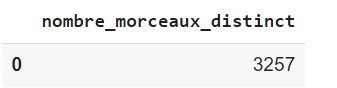

### Question SQL 3.3

In [5]:
pd.read_sql("""SELECT COUNT(DISTINCT(Track.Name)) as nombre_morceaxu_distinct
               FROM Track""",
            conn)

,nombre_morceaxu_distinct
0,3257


> 3.4. **Compétence C1.2** La maison de disque souhaiterai investir dans les genres qui sont les plus représentés, car ce sont les mieux vendu. Combien de morceaux contient le genre le plus représenté ?

Résultat attendu :

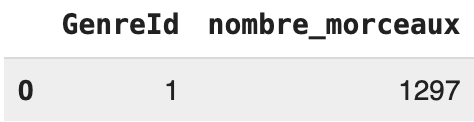

### Question SQL 3.4

In [6]:
pd.read_sql("""SELECT GenreId, COUNT(TrackID) as nombre_morceaux
               FROM Track
               GROUP BY GenreId
               ORDER BY nombre_morceaux DESC
               LIMIT 1""", conn)

,GenreId,nombre_morceaux
0,1,1297


---

## RGPD  



4: **Compétence C1.7** Que signifie RGPD, et quel est son objectif principal ?


### Question SQL/RGPD 4. Compétence C1.7
**Réponse:**

L'acronyme RGPD signifie Réglèment Général sur la Protection des Données. Ce règlement est un règlement européen traite de la protection des données à caractères personnels tel que le nom, prénom, l'adresse, ou toute autre information à caractère personnel (C'est à dire qui permettrait de vous identifier vous et non quelqu'un d'autre).
<br></br>
Le principal objectif de ce règlement est de créer les règlements communes aux 27 états membre de l'UE afin de protéger les données des personnes et encadrer l'utilisation de ces dernières.
<br></br>
Ce reglèment a du être retranscrit en France puisque tout règlement européen prime sur le droit nationnal, conformément à l'article 288 du traité sur le fonctionnement de l'Union européenne (TFUE). Ce reglèment est mis en application notemment par la CNIL, la Commission Nationnale de l'Informatique et des Libertés.
<br></br>

## Web Scraping



5. **Compétence C1.5** Votre collègue de bureau à qui vous avez partagé le DataFrame `df_all` souhaite récuperer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

### Question 5. Compétence C1.5
**Réponse:**
Pour obtenir ce que renvoi la variable "response", qui a priori, est une requête via la librairie requests, il suivi d'afficher la variable "response" à l'aide de la fonction intégrée de Python "print" :



```
import requests
url = "...df_all.."
response = requests.get(url)
print(response)
```

Cela devrait retourner un résultat avec un code :  "<Response [404]>" ou "<Response [200]>
<br></br>

Si le code renvoyé est 200, la requête est valide, et il peut extraire les données, par exemple avec BeautifulSoup.
<br></br>
L'erreur 404 inquide que le site passé dans la varible "url" n'existe pas, il faut qu'il vérifie la synthaxe ou que je regarde que le lien est toujours valide.
<br></br>


## API

Voici les données de géolocalisation d'un appartement. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [7]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. **Compétence C1.6** Utiliser la partie **reverse** de l'API [`https://adresse.data.gouv.fr/api-doc/adresse`](https://adresse.data.gouv.fr/api-doc/adresse) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


### Question 6. Compétence C1.6

In [8]:
import requests #Import de la bibliothèque requests

url        = """https://www.google.com/url?q=https%3A%2F%2Fadresse
                .data.gouv.fr%2Fapi-doc%2Fadresse""" #Test API
response  = requests.get(url)

print("Test appel API :", response)

adresse   = f"""https://api-adresse.data.gouv.fr/reverse/?lon=
                    {longitude_appartement}&lat={latitude_appartement}"""
                    #Recherche par rapport à la longitute et latitude donnée
r_adresse = requests.get(adresse)
r_texte = r_adresse.text      #Transformation de la réponse en chaîne de caractère
print("Réponse avec l'adresse :", r_adresse)
print("Réponse au format texte:", r_texte)


Test appel API : <Response [200]>
Réponse avec l'adresse : <Response [200]>
Réponse au format texte: {"type":"FeatureCollection","version":"draft","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[2.337614,48.895555]},"properties":{"label":"111 Rue Damrémont 75018 Paris","score":0.9999999505653318,"housenumber":"111","id":"75118_2534_00111","name":"111 Rue Damrémont","postcode":"75018","citycode":"75118","x":651435.17,"y":6866375.66,"city":"Paris","district":"Paris 18e Arrondissement","context":"75, Paris, Île-de-France","type":"housenumber","importance":0.80392,"street":"Rue Damrémont","distance":11}},{"type":"Feature","geometry":{"type":"Point","coordinates":[2.337857,48.895452]},"properties":{"label":"130 Rue Championnet 75018 Paris","score":0.9999995866724409,"housenumber":"130","id":"75118_1723_00130","name":"130 Rue Championnet","postcode":"75018","citycode":"75118","x":651452.89,"y":6866364.06,"city":"Paris","district":"Paris 18e Arrondissement","context":"

In [9]:
import json #Importation de la bibliothèque json
r_dict = json.loads(r_texte) #transformation du texte en JSON
ext_ad = r_dict["features"][0]["properties"]["label"]
#Dans le dictionnaire, l'adresse est dans le premier élément de la clé features
#dans la clé label du dictionnaire contenu dans la clé properties
print(ext_ad)

111 Rue Damrémont 75018 Paris


---

# Pandas _(2 heures)_

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [10]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_paris.csv")

df_transactions

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-1090117,206450.0,21,9830,1,appartement,Paris 17e Arrondissement,Epinettes 7,75117,75,751176807,75117000DH0132,2.321425,48.892270,2019-10-07
286,2018-1400990,113000.0,11,10272,1,appartement,Paris 18e Arrondissement,Clignancourt 24,75118,75,751187024,75118000BE0079,2.343846,48.895130,2018-05-23
287,2018-1391042,315000.0,30,10500,2,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BK0018,2.288922,48.838097,2018-12-27
288,2018-1402082,366000.0,58,6310,4,appartement,Paris 18e Arrondissement,Chapelle 5,75118,75,751187205,75118000CZ0021,2.361734,48.893486,2018-07-26


> 7. **Compétence C2.6** Extraire les valeurs aberrantes, qui ont surface supérieure à 6000 et les insérer dans un DataFrame, nommé `df_outliers`. Renvoyer le nombre de lignes pour ce DataFrame.

##Question 7 à 10

### Question 7

In [11]:
df_outliers = df_transactions[df_transactions["surface_reelle_bati"]>6000]

print("Nombre de ligne avec une valeur abérante : ", df_outliers.shape[0],"\n")

#Nombre de ligne
display(df_outliers[["nom_commune","surface_reelle_bati"]])

Nombre de ligne avec une valeur abérante :  4 



,nom_commune,surface_reelle_bati
50,Paris 19e Arrondissement,8290
113,Paris 16e Arrondissement,11887
130,Paris 19e Arrondissement,7385
190,Paris 11e Arrondissement,7128


> 8. **Compétence C2.6 (deuxième chance)** Vérifier le nombre de valeurs manquantes pour chaque colonne.

### Question 8

In [12]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                290 non-null    object 
 1   valeur_fonciere            290 non-null    float64
 2   surface_reelle_bati        290 non-null    int64  
 3   prix_m2                    290 non-null    int64  
 4   nombre_pieces_principales  290 non-null    int64  
 5   type_local                 290 non-null    object 
 6   nom_commune                290 non-null    object 
 7   nom_iris                   290 non-null    object 
 8   code_commune               290 non-null    int64  
 9   code_departement           290 non-null    int64  
 10  code_iris                  290 non-null    int64  
 11  id_parcelles               290 non-null    object 
 12  longitude                  290 non-null    float64
 13  latitude                   290 non-null    float64

Il n'y pas de valeur manquate dans le dataset
<br></br>

### Question 9

> 9. **Compétence C2.5** Observer le nombre de valeurs distinctes pour la colonne "type_local" pour `df_transactions`.

In [13]:
type_local = df_transactions["type_local"].unique().tolist()
for types in type_local:
    print("type de local :",types)

type de local : appartement
type de local : local industriel


> 10. **Compétence C2.5** Quelle est la moyenne de la "surface_reelle_bati" pour chaque valeur de la variable "type_local"?

### Question 10

In [14]:
mean_surface_by_type = df_transactions.groupby("type_local")["surface_reelle_bati"].mean()
print(mean_surface_by_type)

type_local
appartement           47.356643
local industriel    8672.500000
Name: surface_reelle_bati, dtype: float64


---

## Regex

> 11. **Compétence C2.7, Compétence C2.3** Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous, à l'aide d'une fonction que vous allez créer:

In [15]:
adresse = "8 Passage Petit Cerf 75017 Paris"

### Question 11

In [16]:
import re                                  #import de la bibliothèque

adresse = "8 Passage Petit Cerf 75017 Paris"

def code_postal(texte):                    #création de la fonction
    cp = re.search("\d{5}",texte).group(0) #extraction de 5 chiffres sucessifs
    return cp                              #ce que la fonction retourne

cp_adresse = code_postal(adresse)          #Application de la fonction sur adresse
print(cp_adresse)

75017


## Méthode Agile SCRUM



> 12. **Compétence C2.2** Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

### Question 12. Compétence C2.2
**Réponse :**

La méthode SCRUM est une méthode du manifeste Agile dont l'objectif est de promouvoir une approche plus flexible et adaptative pour le développement de logiciels.
<br></br>
Dans ce manifeste, une des méthodes décrite est la méthode SCRUM créee en 1986 par Hirotaka Takeuchi et Ikujiro Nonaka.
<br></br>
Cette méthode de gestion de projet définit 3 rôles principaux : le SCRUM master, le product owner et le ou les concepteurs du projets (développeurs par exemple).
<br></br>
Le rôle du SCRUM master est de guider les équipes tout au long du projet. Il définit le planning, le rythme et les objectifs du projet.
Le but est d'avoir un leader, et non chef, quelqu'un regarde le projet dans son ensemble et qui oriente le travail des équipes.
<br></br>
Le rôle du product owner est de représenter le client final, c'est lui qui échange le plus avec le client pour vérifier que le projet répond aux attentes initiales. Il doit collecter et prioriser les besoins du client puis les transmettres à l'équipe.
<br></br>

## Sélection de données

Voici un nouveau Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.



In [17]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions.head(1)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.8723,2018-01-02


> 13.**Compétence C2.1** Créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

### Question 13

In [18]:
df_flats = df_transactions[df_transactions["type_local"]=="appartement"]
print(f"Il y a {df_flats.shape[0]} appartements dans le dataset")

Il y a 48921 appartements dans le dataset


===============================================

# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning,  notre objectif sera de créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris. Vous utiliserez donc le DataFrame `df_flats`.

> 13. Ne garder que les colonnes [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune`] pour le DataFrame `df_flats`.

### Question 13.bis ML

In [19]:
df_flats_ML = df_flats[["valeur_fonciere", "surface_reelle_bati", "nombre_pieces_principales", "code_commune"]]
df_flats_ML.head(1)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_commune
0,280000.0,25,2,75120



> **Compétence C3.5**
14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_flats`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



**Réponse**

### Question 14. Compétences C3.5
Si il était possible d'enrichir les données avec l'exposition au soleil de l'appartement, cette donnée pourrait influencer le modèle et augmenter la précision.
<br></br>
Cette colonne pourrait donc améliorer la précision du modèle, si on parvient à numériser la colonne.
<br></br>
On peut créer une colonne pour orientation unique du dataset, avec comme donnée 0 ou 1 en fonction de si l'appartement est ou non dans le quartier en question.
<br></br>
L'amélioration de la précision du modèle sera contre balancer par un temps de calcul plus important pour le modèle car le nombre de caratéristiques à analyser sera plus important.
<br></br>
Aussi on pourrait extraire l'arrondissement de l'appartement, cette donnée pourrait permettre de regrouper les appartements par quartier et une analyse plus précise, dû au fait que les différents quartiers de Paris ont des moyennes de prix très différentes.<br></br>

## Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 14. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.
`X` est composé des variables `surface_reelle_bati`, `nombre_pieces_principales` et `code_commune`.
`y` est la variable `valeur_fonciere`.


In [20]:
X = df_flats_ML[["surface_reelle_bati","nombre_pieces_principales","code_commune"]].copy()
y = df_flats["valeur_fonciere"]
display(X.head(1))
print("\n\n")
display(y.head(1))

,surface_reelle_bati,nombre_pieces_principales,code_commune
0,25,2,75120


0    280000.0
Name: valeur_fonciere, dtype: float64

> 15. La colonne `code_commune` contient des codes, représentant les arrondissements, ce qui signifie que ce sont des valeurs discrètes. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `code_commune` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

### Question 15

In [21]:
X["code_commune"] = X["code_commune"].astype("str")
X = pd.get_dummies(X,prefix="",prefix_sep="",dtype="int")
X.head(1)

,surface_reelle_bati,nombre_pieces_principales,75101,75102,75103,75104,75105,75106,75107,75108,...,75111,75112,75113,75114,75115,75116,75117,75118,75119,75120
0,25,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


> 16. **Compétence C3.2** Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

### Question 16

In [22]:
from sklearn.model_selection import train_test_split
#Import du module train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=0)

> 17. Importer le modèle `Linear Regression` de la librairie `sklearn`

### Question 17

In [23]:
from sklearn.linear_model import LinearRegression #importation du modèle
lr_model = LinearRegression()


> 18. **Compétence C3.3** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

### Question 18. Compétence C3.3

**Réponse:**

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr_model.fit(X_train, y_train) #entraînement du modèle sur les données train

y_pred = lr_model.predict(X_test) #prédictions sur les données test
r2     = r2_score(y_test, y_pred) #calcul du r2
mae    = mean_absolute_error(y_test, y_pred) #calcul MAE


print(f"R2 Score : {r2}")
print(f"MAE : {mae}")

R2 Score : 0.8498379987793249
MAE : 92626.6658264932


===========================================

Interprétation des métriques :

Le coeficient R2 mesure la proportion de la variance entre la prédiction y_pred et les valeurs réelles y_test. Ce score varie entre 0 et 1, 1 étant le score parfait.

Ici notre score est de 0.84 ce qui un score relativement bon. Cependant il faut associé ce score à d'autres métriques car ici on ne peut conclure sur la variabilité des prix prédits.

La MAE mesure la moyenne des écarts en valeur absolue entre la valeur prédite et la valeur réelle.

Nous avons ici une MAE de 92 926 qui montre un écart moyen entre le prix prédit et le prix réelle de 92 926€.


===========================================

> 19. **Compétence C3.7** Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

### Question 19. Compétence C3.7
**Réponse :**

La régression linéaire est un modèle de prédiction supervisé qui prédit une valeur numérique à partir d'une ou plusieurs variables d'entrée (régression linéaire multivariée). Elle cherche à établir une relation linéaire entre les variables d'entrée et la variable de sortie. Le but est de trouver la meilleure ligne droite qui minimise l'écart entre les valeurs prédites et les valeurs réelles.

Ici nous utilisons un modèle d'apprentissage de regression linéaire multivariée qui a pour variable d'entrée :

 - La surface du bien
 - Le nombre de pièces principales
 - Si l'appartement est ou non dans l'arrondissement et ce pour chaque arrondissement

> 20. **Compétence C3.1** Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est à dire "valeur foncière" ?

### Question 20. Compétence C3.1
**Réponse :**


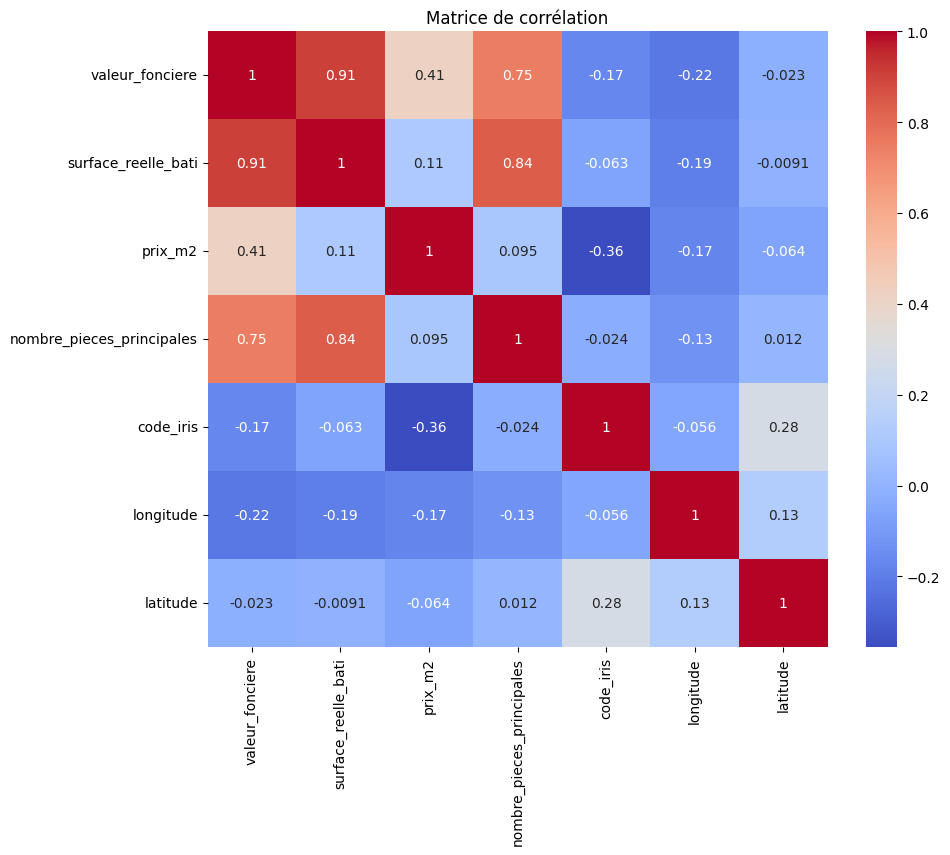

In [25]:
import seaborn as sns #Import des bibliothèques de visualisation
import matplotlib.pyplot as plt
df_flats_corr = df_flats.drop(columns=["code_departement","code_commune"])
#j'ai retiré ces colonnes qui étaient inutiles
corr = df_flats_corr.corr(numeric_only=True).dropna(how='all')
# Suppression dles lignes et colonnes contenant des valeurs manquantes

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm') #Heatmap
plt.title('Matrice de corrélation')
plt.show()



Les valeurs qui sont le plus corrélés avec la valeur foncière d'un bien sont la surface réelle et le nombre de pièces principales.

<br></br>


## Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [26]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_idf_no_paris.csv")
df_ml_idf.head(1)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local
0,282000.0,101,4,maison


> 21. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison ou un appartement.
`X` est composé des `valeur_fonciere`, `surface_reelle_bati` et`nombre_pieces_principales`.
`y` est la variable `type_local`.

### Question 21

In [27]:
X_dt = df_ml_idf[["valeur_fonciere","surface_reelle_bati","nombre_pieces_principales"]]
y_dt = df_ml_idf["type_local"]

> 22. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

### Question 22

In [28]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt,y_dt,test_size=0.25,random_state=0)

> 23. Importer le modèle `DecisionTreeClassifier` ou `KNeighborsClassifier` de la librairie sklearn.

### Question 23

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()


> 24. **Compétence C3.4** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

### Question 24. Compétence C3.4

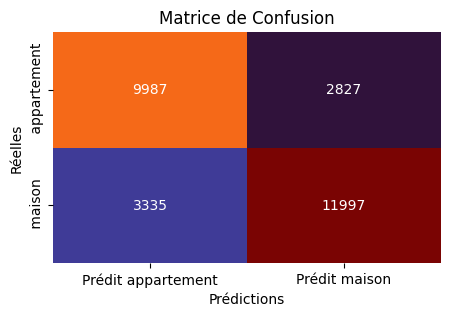

Précision du modèle :  0.78


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

dt_model.fit(X_train_dt, y_train_dt) #entraînement du modèle sur les données train
y_dt_predict = dt_model.predict(X_test_dt)

valeurs_reelles = y_test_dt
predictions     = y_dt_predict

classes = valeurs_reelles.unique()

matrice_confusion = confusion_matrix(valeurs_reelles, predictions)
accuracy          = accuracy_score(valeurs_reelles, predictions)

plt.figure(figsize=(5, 3))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="turbo", cbar=False,
            xticklabels=[f"Prédit {classes[0]}", f"Prédit {classes[1]}"],
            yticklabels=[f" {classes[0]}", f" {classes[1]}"])

plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Matrice de Confusion")
plt.show()

print("Précision du modèle : ", round(accuracy,2))



**Réponse :**

J'ai utilisé le score de précision qui mesure simplement de manière global la proportion de bonnes prédictions sur le total des prédictions.

J'ai également affiché la matrice de confusion qui détail selon la catégorie à prédire

> 25. **Compétence C3.6** On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

### Question 25. Compétence C3.6
**Réponse :**

La limite de la séparation en deux groupes distinct entraîne des limites :    

 - L'échantillon de donnée peut être insuffisant, et réduire la précision du modèle
 - Les résultats varient selon répartition des données, il faut donc bien évaluer les résultats
 - Il faut s'assurer d'éviter des biais de sélection en créer un jeu de test de données alétoires.

> 26. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

### Question 26. Compétence C3.6
**Réponse :**

Le recall mesure la proportion de vrais positifs parmi toutes les instances
La précision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives (vrais positifs + faux positifs).



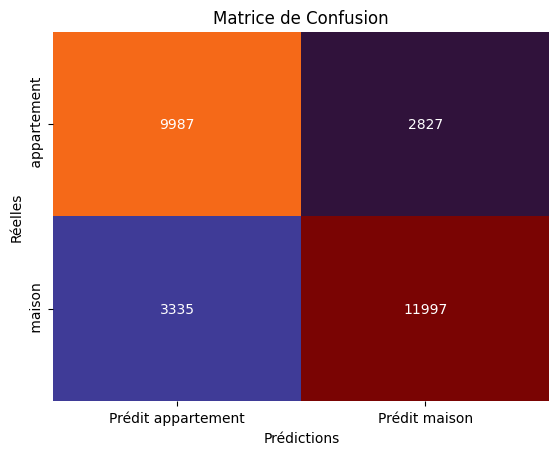

In [31]:
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="turbo", cbar=False,
            xticklabels=[f"Prédit {classes[0]}", f"Prédit {classes[1]}"],
            yticklabels=[f" {classes[0]}", f" {classes[1]}"])

plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.title("Matrice de Confusion")
plt.show()

===========================

Commentaire Matrice confusion

Le modèle a prédit 10002 appartements comme étant bien des appartements, mais 3343 lignes prédites comme un appartement était en réalité des maisons.

Inversement il a correctement prédit 11 989 maisons mais il a mal prédit 2812 maisons, qu'il a idenfié comme un appartement.


============================



```
FIN PREMIERE PARTIE
```



# Étude de marché - Vin _(8 heures)_

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv


## Livrables attendus
**Compétence C4.6, Compétence C4.1** Le client souhaite une présentation (et non pas du code)
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés  **Compétence C2.2**
- Présentation de la partie technique et du code créé, si code il y a, pour cette analyse
- Votre tableau de bord contient des graphiques. **Compétence C4.2**
- Votre tableau de bord contient au moins une visualisation de données interactive. **Compétence C4.3**
- Votre tableau de bord contient au moins une carte représentant des informations géographiques. **Compétence C4.4**
- Votre tableau de bord contient au moins un tableau croisé. **Compétence C4.5**
- L'ensemble des graphiques et visuels doivent être lisible par tous (prise en compte des personne en situation de handicap visuel). **Compétence C4.7**
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

Effectuez tout d'abord la trame ci-dessous. Puis, si vous avez des bonnes idées à proposer au client, elles sont évidemment les bienvenues.



## Préparation des données et exploration des données

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Vous allez donc réaliser un ensemble de dataviz, avec l'outil de votre choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Vous pouvez par exemple intégrer dans votre tableau de bord:
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésitez pas à être original dans la présentation et les dataviz utilisées.

## Proposition de valeur

Avec le tableau de bord que vous lui avez fourni, le client a une idée précise de ses concurrents. Faites lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essayez de garder un oeil critique et visuel sur votre tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pensez donc à "vendre" votre analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

## C'est à vous de jouer:

### Import des données


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df = pd.read_csv(link)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [33]:
df_bottle = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv")
df_wines  = df.copy()

display(df_bottle.head())
print("\n----\n")
display(df_wines.head(1))

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix



----



,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia


### Analyse exploratoire du dataset des vins vendus aux USA

In [34]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [35]:
df_wines.describe()

,points,price
count,129957.000000,120964.000000
mean,88.446655,36.390827
std,3.039481,32.802430
min,80.000000,2.000000
25%,86.000000,21.000000
50%,88.000000,29.000000
75%,91.000000,42.000000
max,100.000000,1902.000000


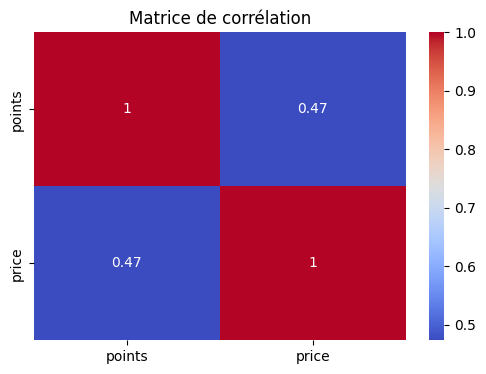

In [36]:
df_wines_corr = df_wines.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(df_wines_corr, annot=True, cmap='coolwarm') #Heatmap
plt.title('Matrice de corrélation')
plt.show()

On remarque qu'il y a une legère correlation positive entre le nombre de points et le prix d'une bouteille.

Mais il nous manque des informations utiles comme l'année pour bien explorer les données

In [37]:
df_wines["title"].sample(25)

41426     Reichsgraf von Kesselstatt 2020 Graach Josephs...
32193        Tenuta di Valgiano 2015 Red (Colline Lucchesi)
79297     Herdade Grande 2022 Colheita Seleccionada Whit...
84896     Wm. Harrison 2019 Cabernet Sauvignon (Rutherford)
104213    Owen Roe 2017 Red Willow Vineyard Chapel Block...
52566     Principe di Corleone 2021 Bianca di Corte Whit...
111792           Sobon Estate 2015 Viognier (Amador County)
22321     Brutocao 2019 Contento Vineyard Estate Bottled...
84858     Pisano 2015 Arretxea Estate Bottled Grand Rese...
41928                 Batzella 2018 Mezzodì White (Toscana)
84273                         Brezza 2018 Cannubi  (Barolo)
61593                 San Simeon 2018 Pinot Noir (Monterey)
32836                   Portlandia 2019 Pinot Noir (Oregon)
8194            Louis Roederer NV Premier Brut  (Champagne)
77840     Sinor-LaVallee 2019 Anniversary Cuvée Syrah (S...
26538                Château Beychevelle 2019  Saint-Julien
9818       Casa Ferreirinha 2019 Quinta 

Il y a régulièrement l'année dans le titre de la bouteille

In [38]:
df_wines["year"] =  df_wines['title'].str.extract(r'(\d{4})')
#extraction de l'année sur les 4 premiers chiffres successifs
df_wines["year"].unique()
#vérification

array(['2019', '2017', '2018', '2016', '2013', '2015', '2014', '2020',
       '2021', nan, '2022', '2010', '2009', '2012', '2007', '2011',
       '2008', '1889', '2006', '2005', '1997', '2003', '2002', '1879',
       '2023', '2001', '1874', '1639', '1870', '1900', '1494', '2004',
       '7202', '1854', '2000', '1998', '1842', '1931', '1914', '1877',
       '1982', '1966', '1850', '1872', '1858', '1989', '1969', '1996',
       '1994', '1829', '1862', '1852', '1002', '1986', '1993', '1995',
       '1999', '1971', '1884', '1937', '1505', '1823', '1979', '1984',
       '1967', '1970', '1949', '1965', '1072', '1991', '1929', '1906',
       '1849', '1988', '1992', '1754', '1791', '1609', '1623', '1921',
       '1959', '1968', '1990', '1963', '1847', '1954', '1152', '1943',
       '1980', '3002', '1936', '1947'], dtype=object)

Il y a quelques années abérantes et des bouteilles très anciennes.
La bouteille de notre client est de 2016, je vais donc réduire le dataset wines aux années 2000

In [39]:
df_wines["year"] = df_wines["year"].fillna("0") #gestion des valeurs manquantes
df_wines["year"] =df_wines["year"].astype("int") #transformation en entier
df_wines_2000 = df_wines[df_wines["year"]>=2000] #filtre sur les années 2000

In [40]:
display(df_wines_2000.head(5))
print("\n Nombre de bouteilles restantes :",df_wines_2000.shape[0])

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia,2019
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2017
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2019
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2019
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2018



 Nombre de bouteilles restantes : 125096


In [41]:
df_wines_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125096 entries, 0 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                125035 non-null  object 
 1   description            125096 non-null  object 
 2   designation            88009 non-null   object 
 3   points                 125096 non-null  int64  
 4   price                  116601 non-null  float64
 5   province               125035 non-null  object 
 6   region_1               104455 non-null  object 
 7   region_2               49685 non-null   object 
 8   taster_name            99992 non-null   object 
 9   taster_twitter_handle  95165 non-null   object 
 10  title                  125096 non-null  object 
 11  variety                125095 non-null  object 
 12  winery                 125096 non-null  object 
 13  year                   125096 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memor

J'ai décidé de garder toutes les colonnes textuelles et remplacer les valeurs manquantes par "Inconnu"
L'information la plus importante selon moi est la colonne variety, qui donne le cépage du vin. Je vais donc retirer la ligne manquante.

Pour les données numériques, il est difficile de remplacer les valeurs manquantes, les prix sont très dispersés. On fausserait les données. Je retire également les lignes dont le prix n'est pas connu.

In [42]:
df_wines_2000_update = df_wines_2000.copy().dropna(subset="variety")
df_wines_2000_update = df_wines_2000_update.dropna(subset="price")
df_wines_2000_update = df_wines_2000_update.fillna("Inconnu")


In [43]:
df_wines_2000_update = df_wines_2000_update.drop_duplicates()
#suppression des doublons

In [44]:
df_wines_2000_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107544 entries, 1 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                107544 non-null  object 
 1   description            107544 non-null  object 
 2   designation            107544 non-null  object 
 3   points                 107544 non-null  int64  
 4   price                  107544 non-null  float64
 5   province               107544 non-null  object 
 6   region_1               107544 non-null  object 
 7   region_2               107544 non-null  object 
 8   taster_name            107544 non-null  object 
 9   taster_twitter_handle  107544 non-null  object 
 10  title                  107544 non-null  object 
 11  variety                107544 non-null  object 
 12  winery                 107544 non-null  object 
 13  year                   107544 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memor

In [45]:
df_wines_2000_update["country"].unique().tolist()

['Portugal',
 'US',
 'Spain',
 'Italy',
 'France',
 'Germany',
 'Argentina',
 'Chile',
 'Australia',
 'Austria',
 'South Africa',
 'New Zealand',
 'Israel',
 'Hungary',
 'Greece',
 'Romania',
 'Mexico',
 'Canada',
 'Inconnu',
 'Turkey',
 'Czech Republic',
 'Slovenia',
 'Croatia',
 'Georgia',
 'Uruguay',
 'England',
 'Lebanon',
 'Serbia',
 'Brazil',
 'Moldova',
 'Morocco',
 'Peru',
 'India',
 'Bulgaria',
 'Cyprus',
 'Armenia',
 'Switzerland',
 'Bosnia and Herzegovina',
 'Slovakia',
 'Macedonia',
 'Ukraine',
 'Luxembourg',
 'China']

### Graphiques et reflexion sur les indicateurs

Notre client vent un Pinot Noir, produit dans la région "Burgundy" - Bourgogne.

Je vais donc analyser plus en détail cette partie

Mais avant, je vais montrer quelques points sur le dataset global pour donner des informations pertinentes

#### Analyse globale

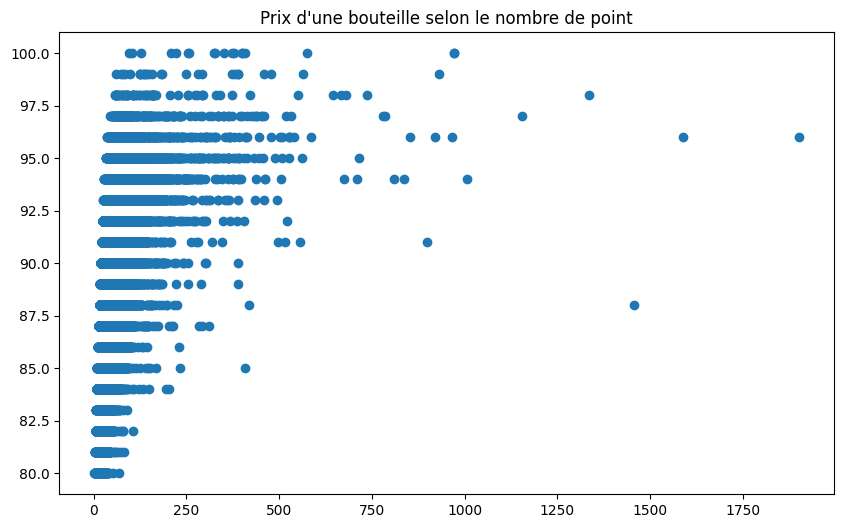

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 6))

plt.scatter(df_wines_2000_update["price"],df_wines_2000_update["points"])
ax1.set_title("Prix d'une bouteille selon le nombre de point")
plt.show()

Il y a de nombreuses différences de prix et une corrélation positive entre les points et le prix

In [47]:
df_wines_2000_update[["price","points"]].corr()

,price,points
price,1.000000,0.502794
points,0.502794,1.000000


Cette corrélation est toujours modérée

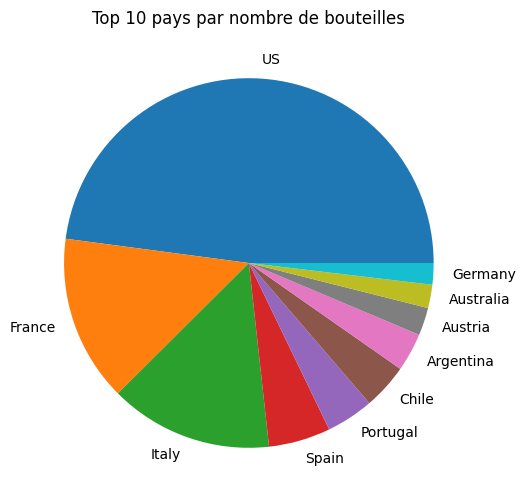

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 6))
df_nb_title_by_country = df_wines_2000_update.groupby('country')['title'].count()
top_10_country = df_nb_title_by_country.sort_values(ascending=False).head(10)
plt.pie(labels = top_10_country.index, x=top_10_country)
ax1.set_title("Top 10 pays par nombre de bouteilles")
plt.show()

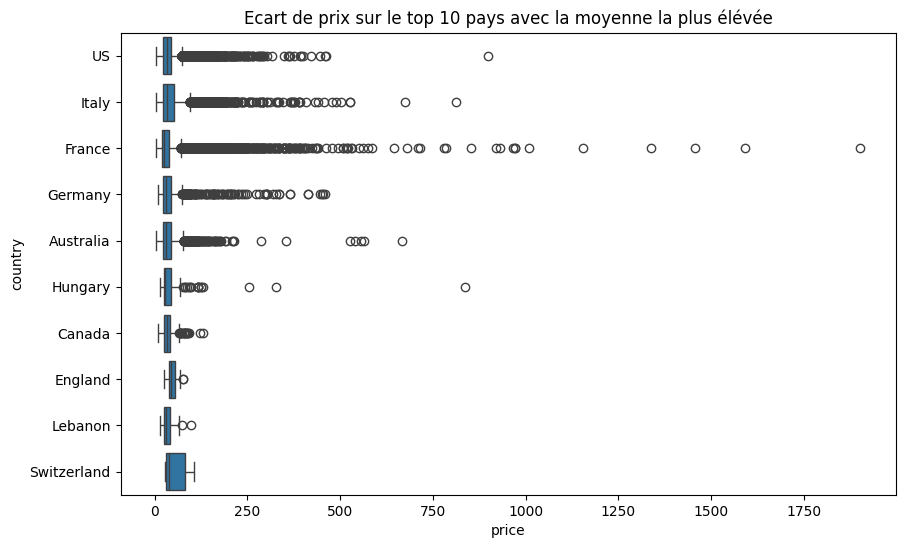

In [49]:
mean_price_by_country = df_wines_2000_update.groupby("country")["price"].mean()
top_10_mean_price_by_country = mean_price_by_country.sort_values(ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10,6))

ax1 = sns.boxplot(data=df_wines_2000_update[df_wines_2000_update["country"].isin(top_10_mean_price_by_country.index)], x="price",y="country")
ax1.set_title("Ecart de prix sur le top 10 pays avec la moyenne la plus élévée")
plt.show()

La France est le pays où les écarts de prix sont les plus importants, la Suisse est le pays avec les écarts les plus faibles.

Notre client étant français, le prix sera plus difficile à déterminer.

#### Analyse locale

##### France

In [50]:
df_french_wine_2000 = df_wines_2000_update[df_wines_2000_update["country"]=="France"]
df_french_wine_2000.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
95652,France,This rounded wine adds richness to its herbace...,Petit Bourgeois,86,16.0,France Other,Vin de France,Inconnu,Roger Voss,@vossroger,Henri Bourgeois 2019 Petit Bourgeois Sauvignon...,Sauvignon Blanc,Henri Bourgeois,2019
9123,France,"Made from old vines, this complex and structur...",Grand Vin,90,35.0,Bordeaux,Blaye Côtes de Bordeaux,Inconnu,Roger Voss,@vossroger,Château la Baronnerie 2016 Grand Vin (Blaye C...,Bordeaux-style Red Blend,Château la Baronnerie,2016
39420,France,Chenin Blanc from Cahors makes sweet wines wit...,Clos Triguedina L'Or du Clos,90,39.0,Southwest France,Inconnu,Inconnu,Roger Voss,@vossroger,Jean-Luc Baldès 2015 Clos Triguedina L'Or du C...,Chenin Blanc,Jean-Luc Baldès,2015
84511,France,"As with many Provence rosé producers, this win...",Château Terrebonne Coeur de Cuvée,88,18.0,Provence,Côtes de Provence,Inconnu,Roger Voss,@vossroger,Vindivin 2022 Château Terrebonne Coeur de Cuvé...,Rosé,Vindivin,2022
110906,France,"A blend dominated by Malbec, this wine comes f...",Château la Vieille Eglise,90,22.0,Southwest France,Côtes du Marmandais,Inconnu,Roger Voss,@vossroger,Cave du Marmandais 2021 Château la Vieille Egl...,Bordeaux-style Red Blend,Cave du Marmandais,2021


In [51]:
nb_variete_unique = len(df_french_wine_2000["variety"].unique().tolist())
print(f"Il y a {nb_variete_unique} variétés de vin unique en France")

Il y a 140 variétés de vin unique en France


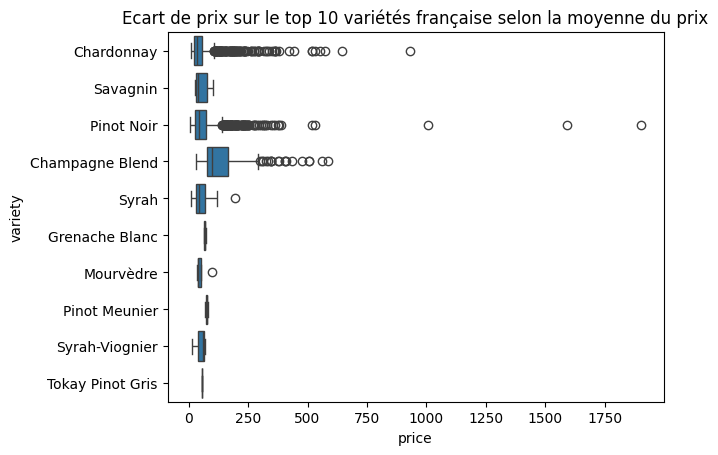

In [52]:
mean_price_by_variety_fr        = df_french_wine_2000.groupby("variety")["price"].mean()
top_10_mean_price_by_variety_fr = mean_price_by_variety_fr.sort_values(ascending=False).head(10)
ax1 = sns.boxplot(data=df_french_wine_2000[df_french_wine_2000["variety"].isin(top_10_mean_price_by_variety_fr.index)], x="price",y="variety")
ax1.set_title("Ecart de prix sur le top 10 variétés française selon la moyenne du prix")
plt.show()

Le Pinot Noir a également une grande variété de prix avec de nombreux outliers

##### Bourgogne

In [53]:
df_burgundy_wine = df_french_wine_2000[df_french_wine_2000["province"]=="Burgundy"]
df_burgundy_wine.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
4388,France,This rounded wine is soft and ripe. Along with...,Inconnu,88,21.0,Burgundy,Saint-Véran,Inconnu,Roger Voss,@vossroger,Domaine Pascal et Mireille Renaud 2021 Saint-...,Chardonnay,Domaine Pascal et Mireille Renaud,2021
100419,France,"This wine has a firm structure, solid with tan...",Les Cazetiers Premier Cru,92,80.0,Burgundy,Gevrey-Chambertin,Inconnu,Roger Voss,@vossroger,Louis Latour 2018 Les Cazetiers Premier Cru (...,Pinot Noir,Louis Latour,2018
87979,France,"Young and fruity, this smoky wine shows the na...",Closerie des Alisiers Domaine Fribourg,85,13.0,Burgundy,Bourgogne Aligoté,Inconnu,Roger Voss,@vossroger,Maison Stéphane Brocard 2021 Closerie des Alis...,Aligoté,Maison Stéphane Brocard,2021
29148,France,"This is rich, complex and full of ripe fruit. ...",Les Charmes Premier Cru,92,96.0,Burgundy,Chambolle-Musigny,Inconnu,Roger Voss,@vossroger,Jean-Claude Boisset 2015 Les Charmes Premier C...,Pinot Noir,Jean-Claude Boisset,2015
66405,France,"A soft, ripe, open wine with yellow fruit flav...",Les Vaillons Premier Cru,89,50.0,Burgundy,Chablis,Inconnu,Roger Voss,@vossroger,Domaine Laroche 2011 Les Vaillons Premier Cru ...,Chardonnay,Domaine Laroche,2011


In [54]:
nb_bouteille_bourgonne = df_burgundy_wine.shape[0]
print(f"Il y a {nb_bouteille_bourgonne} bouteilles différentes en Bourgonne dans les données")

Il y a 2814 bouteilles différentes en Bourgonne dans les données


In [55]:
nb_variete_unique_bur = len(df_burgundy_wine["variety"].unique().tolist())
print(f"Il y a {nb_variete_unique_bur} variétés de vin unique en Bourgonne")

Il y a 16 variétés de vin unique en Bourgonne


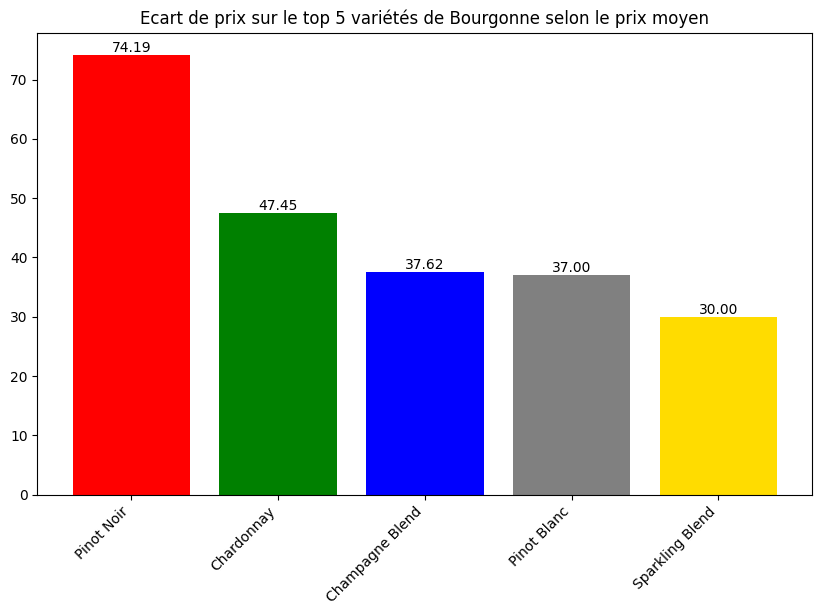

In [56]:
mean_price_bur = df_burgundy_wine.groupby("variety")["price"].mean()
top_5_var_bur  = mean_price_bur.sort_values(ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(10,6))

bars = plt.bar(top_5_var_bur.index, height=top_5_var_bur.values, color=["red","green","blue","grey","#ffdc00"])
plt.xticks(rotation=45, ha='right')
ax1.set_title("Ecart de prix sur le top 5 variétés de Bourgonne selon le prix moyen")

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, "{:.2f}".format(height), ha='center', va='bottom')
    #Affiche les données pour chaque variété avec 2 décimales
plt.show()

##### Pinot Noir

In [57]:
df_pinot_noir = df_wines_2000_update[df_wines_2000_update["variety"]=="Pinot Noir"]
df_pinot_noir[["country","variety","title"]].sample(5)

,country,variety,title
13173,Austria,Pinot Noir,Szigeti 2017 Brut Rosé Pinot Noir (Österreichi...
77940,US,Pinot Noir,Chehalem 2017 Statement Pinot Noir (Ribbon Ridge)
63391,US,Pinot Noir,Laetitia 2016 La Colline Pinot Noir (Arroyo Gr...
43914,US,Pinot Noir,Blue Farm 2020 King Ridge Vineyard Pinot Noir ...
88484,US,Pinot Noir,Björnson 2020 Estate Pinot Noir (Eola-Amity Hi...


In [58]:
df_pinot_noir_fr = df_pinot_noir[df_pinot_noir["country"]=="France"]
df_pinot_noir_fr[["country","variety","title"]].sample(5)

,country,variety,title
93317,France,Pinot Noir,Jaffelin 2015 Nuits-St.-Georges
113994,France,Pinot Noir,Manuel Olivier 2018 Les Damaudes (Vosne-Romanée)
61630,France,Pinot Noir,Domaine Faiveley 2015 Les Rugiens Premier Cru ...
45334,France,Pinot Noir,Albert Bichot 2020 Les Chabiots Premier Cru (...
17301,France,Pinot Noir,Domaines Devillard 2016 Domaine des Perdrix (...


In [59]:
nb_pays_unique = len(df_pinot_noir["country"].unique().tolist())
print(f"Il y a {nb_pays_unique} pays qui vendent du Pinot Noir")

Il y a 24 pays qui vendent du Pinot Noir


In [60]:
nb_pinot_noir_fr = df_pinot_noir_fr.shape[0]
print(f"Il y a {nb_pinot_noir_fr} bouteilles différentes en France")

Il y a 1356 bouteilles différentes en France


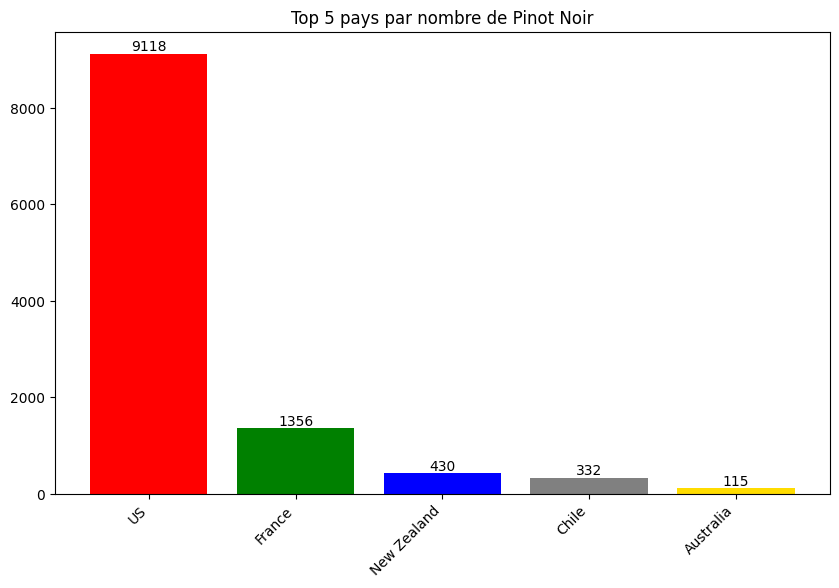

In [61]:
nb_bouteille_par_pays = df_pinot_noir.groupby("country")["title"].count()
top_5_pays_nb_btl = nb_bouteille_par_pays.sort_values(ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(10,6))

bars_pays = plt.bar(top_5_pays_nb_btl.index, height=top_5_pays_nb_btl.values, color=["red","green","blue","grey","#ffdc00"])
plt.xticks(rotation=45, ha='right')

for bar in bars_pays:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')
    #Affiche les données pour chaque variété avec 2 décimales

ax1.set_title("Top 5 pays par nombre de Pinot Noir")

plt.show()

#### Indicateurs

Il nous faut maintenant créer un tableau de bord avec différents indicateurs comme le prix moyen de ventes selon le pays et/ou la variété

Pour une meilleure lisibilité je vais utiliser l'outil PowerBI

In [63]:
df_wines_2000_update.shape[0]

107544

In [62]:
df_wines_2000_update.to_csv("df_wines_2000_update.csv")



```
FIN DEUXIEME PARTIE
```

